In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
data =pd.read_csv('titanic_dataset.csv',index_col='PassengerId')

In [8]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [12]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Missing Values

In [14]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [18]:
for col in ['Age']:
    data[col]=data[col].fillna(data[col].median())

In [19]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [20]:
data.Cabin = data.Cabin.fillna("unknown")
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    2
dtype: int64

In [21]:
data.Embarked = data.Embarked.fillna("unknown")
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [45]:
data['Ticket'].nunique()

681

In [38]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
label_enc =LabelEncoder()

In [48]:
data['Ticket'] = label_enc.fit_transform(data['Ticket'])

In [57]:
data['Name'] = label_enc.fit_transform(data['Name'])

In [66]:
data =data.drop('Sex',axis=1)

In [69]:
data =data.drop('Embarked',axis=1)

In [70]:
data

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare
PassengerId,,,,,,,,
1,0,3,108,28,1,0,523,7.2500
2,1,1,190,51,1,0,596,71.2833
3,1,3,353,34,0,0,669,7.9250
4,1,1,272,47,1,0,49,53.1000
5,0,3,15,47,0,0,472,8.0500
...,...,...,...,...,...,...,...,...
887,0,2,548,35,0,0,101,13.0000
888,1,1,303,24,0,0,14,30.0000
889,0,3,413,36,1,2,675,23.4500


# Normalization

In [90]:
x=data.drop('Survived',axis=1)
y=data['Survived']

In [91]:
x

,Pclass,Name,Age,SibSp,Parch,Ticket,Fare
PassengerId,,,,,,,
1,3,108,28,1,0,523,7.2500
2,1,190,51,1,0,596,71.2833
3,3,353,34,0,0,669,7.9250
4,1,272,47,1,0,49,53.1000
5,3,15,47,0,0,472,8.0500
...,...,...,...,...,...,...,...
887,2,548,35,0,0,101,13.0000
888,1,303,24,0,0,14,30.0000
889,3,413,36,1,2,675,23.4500


In [92]:
x1 =x.drop('Ticket',axis=1)

In [93]:
x =x.drop(['Pclass','Name','Age','SibSp','Parch','Fare'],axis=1)

In [94]:
x1

,Pclass,Name,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,3,108,28,1,0,7.2500
2,1,190,51,1,0,71.2833
3,3,353,34,0,0,7.9250
4,1,272,47,1,0,53.1000
5,3,15,47,0,0,8.0500
...,...,...,...,...,...,...
887,2,548,35,0,0,13.0000
888,1,303,24,0,0,30.0000
889,3,413,36,1,2,23.4500


In [95]:
x

,Ticket
PassengerId,
1,523
2,596
3,669
4,49
5,472
...,...
887,101
888,14
889,675


In [96]:
x1=preprocessing.normalize(x1)

In [97]:
x1

array([[0.02682149, 0.9655735 , 0.25033387, 0.0089405 , 0.        ,
        0.06481859],
       [0.00477904, 0.90801778, 0.24373109, 0.00477904, 0.        ,
        0.34066581],
       [0.00845702, 0.99510948, 0.09584624, 0.        , 0.        ,
        0.02234063],
       ...,
       [0.00722464, 0.99459213, 0.08669568, 0.00240821, 0.00481643,
        0.0564726 ],
       [0.01077201, 0.87253282, 0.36624835, 0.        , 0.        ,
        0.32316031],
       [0.01338525, 0.98158486, 0.18739347, 0.        , 0.        ,
        0.03457856]])

In [98]:
x1=pd.DataFrame(x1,columns=['Pclass','Name','Age','SibSp','Parch','Fare'])

In [99]:
x1

,Pclass,Name,Age,SibSp,Parch,Fare
0,0.026821,0.965573,0.250334,0.008940,0.000000,0.064819
1,0.004779,0.908018,0.243731,0.004779,0.000000,0.340666
2,0.008457,0.995109,0.095846,0.000000,0.000000,0.022341
3,0.003558,0.967643,0.167203,0.003558,0.000000,0.188904
4,0.059907,0.299533,0.938537,0.000000,0.000000,0.160749
...,...,...,...,...,...,...
886,0.003641,0.997680,0.063720,0.000000,0.000000,0.023668
887,0.003274,0.992052,0.078578,0.000000,0.000000,0.098223
888,0.007225,0.994592,0.086696,0.002408,0.004816,0.056473
889,0.010772,0.872533,0.366248,0.000000,0.000000,0.323160


In [100]:
x=pd.concat([x,x1],axis=1)

In [101]:
x

,Ticket,Pclass,Name,Age,SibSp,Parch,Fare
1,523.0,0.004779,0.908018,0.243731,0.004779,0.000000,0.340666
2,596.0,0.008457,0.995109,0.095846,0.000000,0.000000,0.022341
3,669.0,0.003558,0.967643,0.167203,0.003558,0.000000,0.188904
4,49.0,0.059907,0.299533,0.938537,0.000000,0.000000,0.160749
5,472.0,0.005403,0.997765,0.064837,0.000000,0.000000,0.015234
...,...,...,...,...,...,...,...
888,14.0,0.007225,0.994592,0.086696,0.002408,0.004816,0.056473
889,675.0,0.010772,0.872533,0.366248,0.000000,0.000000,0.323160
890,8.0,0.013385,0.981585,0.187393,0.000000,0.000000,0.034579
891,466.0,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
corrmatrix = data.corr()

<AxesSubplot:>

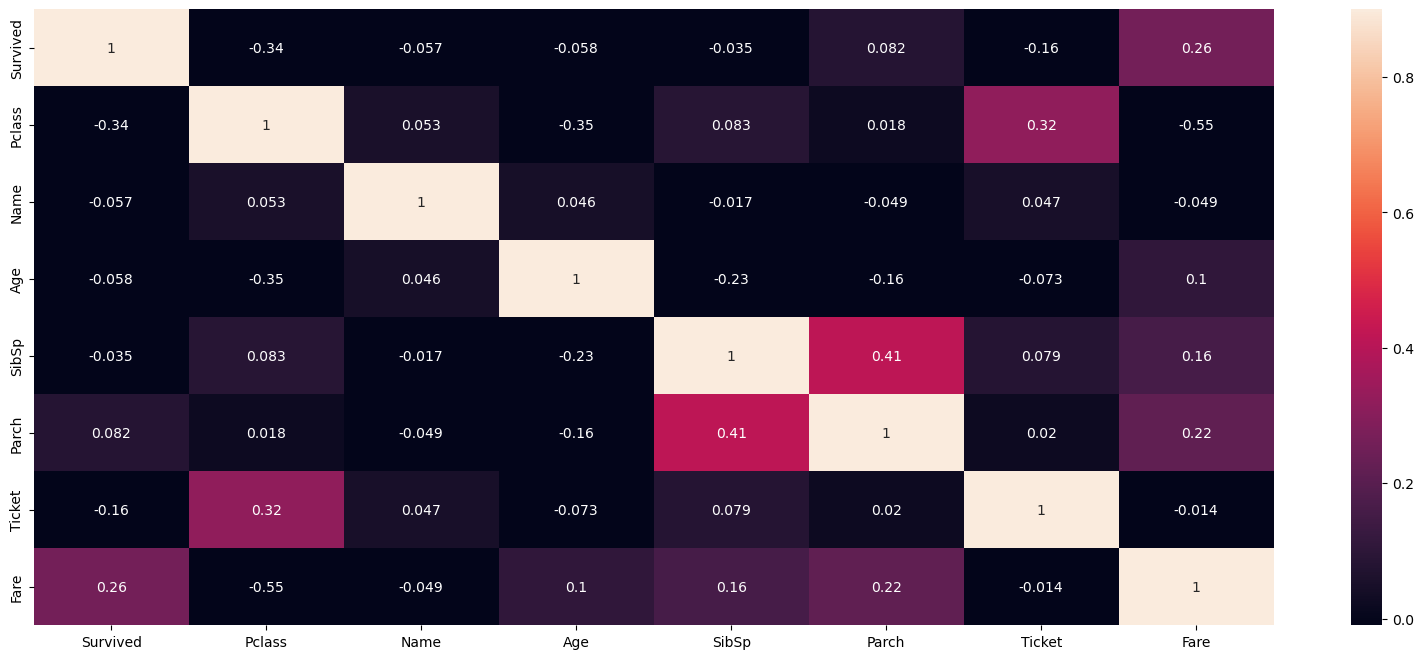

In [116]:
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix, annot=True,vmin=-0.01, vmax=0.9)

In [117]:
data.dtypes

Survived      int64
Pclass        int64
Name          int64
Age           int64
SibSp         int64
Parch         int64
Ticket        int64
Fare        float64
dtype: object

# Outliers

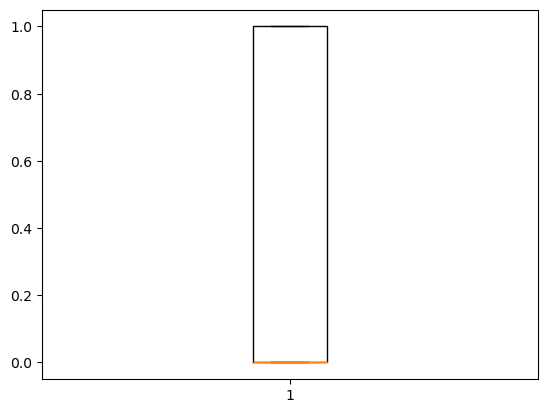

In [118]:
plt.boxplot(data['Survived'])
plt.show()

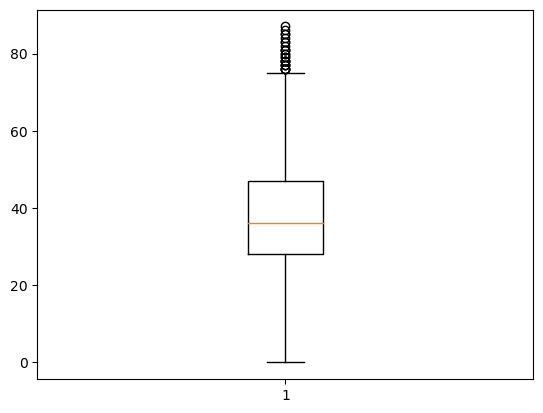

In [119]:
plt.boxplot(data['Age'])
plt.show()

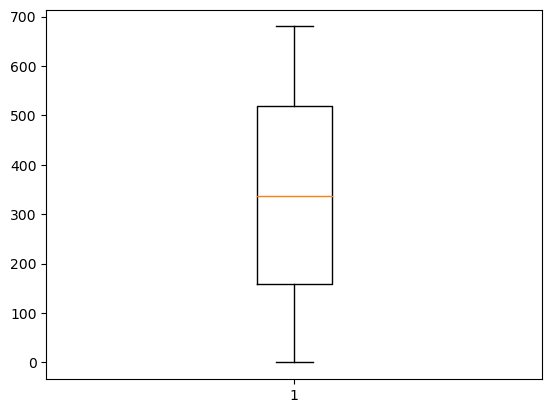

In [120]:
plt.boxplot(data['Ticket'])
plt.show()